In [2]:
# CELL 1: IMPORT REQUIRED LIBRARIES
# This cell imports all the tools we need for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

# Check if GPU is available for faster training
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("🎉 GPU is available! Training will be fast!")
else:
    print("⚠️ Using CPU - training will be slower but will work")

✅ All libraries imported successfully!
TensorFlow version: 2.19.0
🎉 GPU is available! Training will be fast!


In [4]:
# CELL 2: LOAD AND EXPLORE THE DATASET
# This cell loads the facial keypoints data and shows what we're working with

# Load the training data
# Assuming the training.csv file is uploaded directly to the Colab environment
train_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/training/training.csv')
print("📊 DATA OVERVIEW:")
print(f"Number of images: {len(train_df)}")
print(f"Number of columns: {len(train_df.columns)}")

# Show the first few rows
print("\n👀 FIRST 3 ROWS OF DATA:")
print(train_df.head(3))

# Show the column names (these are the facial features we'll detect)
print("\n🎯 FACIAL FEATURES WE'LL DETECT:")
keypoint_columns = [col for col in train_df.columns if col != 'Image']
print(f"Total keypoints: {len(keypoint_columns)}")
print("Examples:", keypoint_columns[:8])  # Show first 8 features

📊 DATA OVERVIEW:
Number of images: 7049
Number of columns: 31

👀 FIRST 3 ROWS OF DATA:
   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   

   right_eye_inner_corner_y  ...  

In [6]:
# CELL 3: UNDERSTAND DATA STRUCTURE AND CHECK FOR ISSUES
# This cell examines the data quality and prepares it for training

print("🔍 CHECKING DATA QUALITY:")

# Check for missing values
missing_values = train_df.isnull().sum().sum()
print(f"Total missing values in dataset: {missing_values}")

# Show which columns have missing values
missing_by_column = train_df.isnull().sum()
columns_with_missing = missing_by_column[missing_by_column > 0]
print(f"Columns with missing values: {len(columns_with_missing)}")

if len(columns_with_missing) > 0:
    print("Columns needing cleanup:")
    for col, count in columns_with_missing.items():
        print(f"  - {col}: {count} missing values")

# Clean the data by filling missing values
print("\n🧹 CLEANING DATA...")
train_df_clean = train_df.fillna(method='ffill')  # Forward fill missing values
print("✅ Missing values filled!")

print(f"Remaining missing values: {train_df_clean.isnull().sum().sum()}")

🔍 CHECKING DATA QUALITY:
Total missing values in dataset: 105412
Columns with missing values: 28
Columns needing cleanup:
  - left_eye_center_x: 10 missing values
  - left_eye_center_y: 10 missing values
  - right_eye_center_x: 13 missing values
  - right_eye_center_y: 13 missing values
  - left_eye_inner_corner_x: 4778 missing values
  - left_eye_inner_corner_y: 4778 missing values
  - left_eye_outer_corner_x: 4782 missing values
  - left_eye_outer_corner_y: 4782 missing values
  - right_eye_inner_corner_x: 4781 missing values
  - right_eye_inner_corner_y: 4781 missing values
  - right_eye_outer_corner_x: 4781 missing values
  - right_eye_outer_corner_y: 4781 missing values
  - left_eyebrow_inner_end_x: 4779 missing values
  - left_eyebrow_inner_end_y: 4779 missing values
  - left_eyebrow_outer_end_x: 4824 missing values
  - left_eyebrow_outer_end_y: 4824 missing values
  - right_eyebrow_inner_end_x: 4779 missing values
  - right_eyebrow_inner_end_y: 4779 missing values
  - right_eyeb

/tmp/ipython-input-249011888.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df_clean = train_df.fillna(method='ffill')  # Forward fill missing values


🎨 VISUALIZING TRAINING SAMPLES...


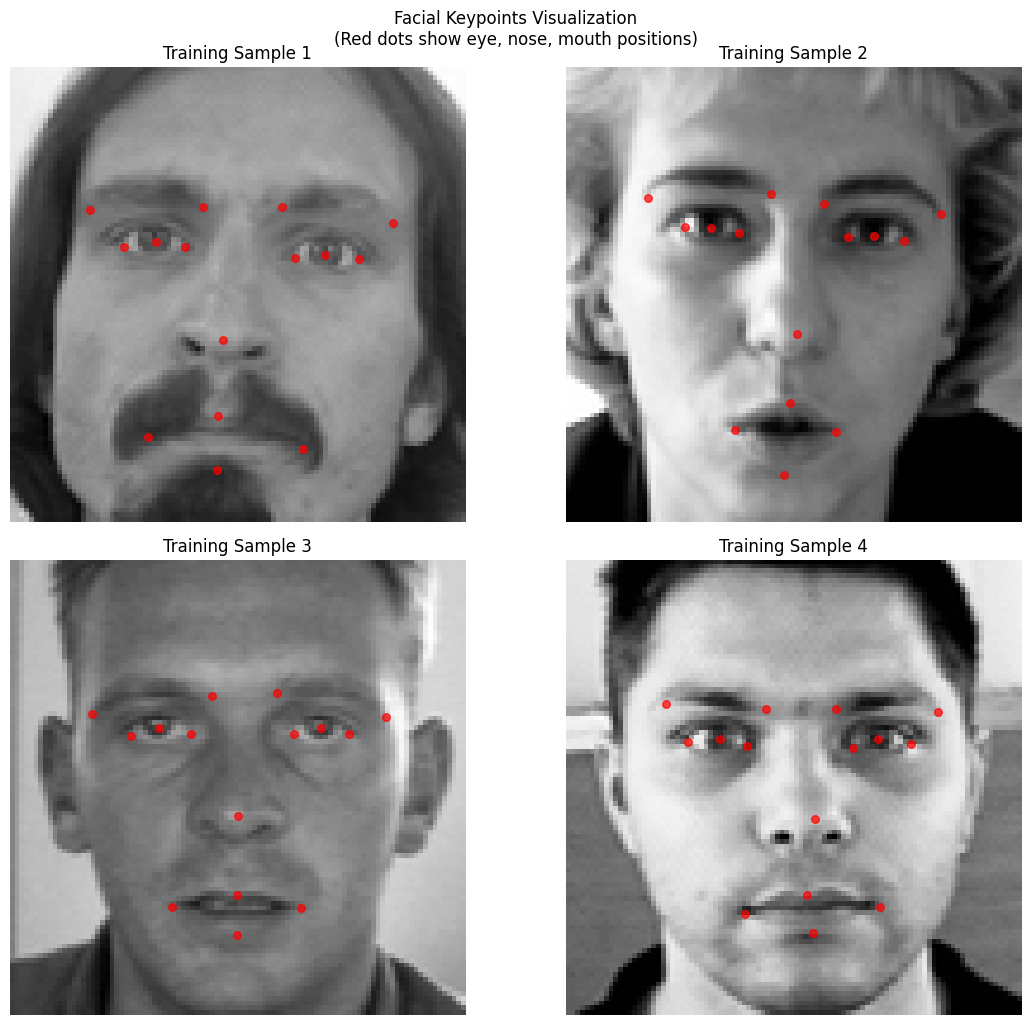

In [7]:
# CELL 4: VISUALIZE SAMPLE FACES WITH KEYPOINTS
# This cell shows what the facial keypoints look like on real images

def visualize_training_samples(num_samples=4):
    """
    Display sample images from the training set with their facial keypoints
    This helps us understand what we're trying to predict
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()  # Flatten the 2x2 array of axes

    for i in range(num_samples):
        # Get the image data (stored as space-separated string)
        img_str = train_df_clean.iloc[i]['Image']
        img_array = np.fromstring(img_str, sep=' ').reshape(96, 96)

        # Get the keypoints (all columns except 'Image')
        keypoints = train_df_clean.iloc[i].drop('Image').values

        # Split into x and y coordinates
        # Even indices: x coordinates (0, 2, 4, ...)
        # Odd indices: y coordinates (1, 3, 5, ...)
        x_coords = keypoints[0::2]
        y_coords = keypoints[1::2]

        # Display the image
        axes[i].imshow(img_array, cmap='gray')

        # Plot the keypoints
        axes[i].scatter(x_coords, y_coords, c='red', s=30, marker='o', alpha=0.7)

        axes[i].set_title(f'Training Sample {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle('Facial Keypoints Visualization\n(Red dots show eye, nose, mouth positions)', y=1.02)
    plt.show()

print("🎨 VISUALIZING TRAINING SAMPLES...")
visualize_training_samples()

In [8]:
# CELL 5: PREPARE DATA FOR NEURAL NETWORK
# This cell converts our data into the format needed for training

def prepare_training_data(df):
    """
    Convert the dataframe into numpy arrays that our neural network can use
    """
    images = []
    keypoints = []

    print("🔄 Converting images and keypoints...")

    for idx, row in df.iterrows():
        try:
            # Convert image from string to 96x96 numpy array
            img_str = row['Image']
            img_array = np.fromstring(img_str, sep=' ').reshape(96, 96, 1)  # 1 channel for grayscale
            images.append(img_array)

            # Get all keypoint coordinates
            kp_values = row.drop('Image').values.astype('float32')
            keypoints.append(kp_values)
        except ValueError as e:
            print(f"⚠️ Skipping row {idx} due to error: {e}")
            continue # Skip this row and continue with the next

    # Convert to numpy arrays
    images_array = np.array(images)
    keypoints_array = np.array(keypoints)

    # Normalize pixel values from 0-255 to 0-1 (helps training)
    images_array = images_array / 255.0

    return images_array, keypoints_array

print("📦 PREPARING TRAINING DATA...")
X, y = prepare_training_data(train_df_clean)

print("✅ DATA PREPARATION COMPLETE:")
print(f"Images shape: {X.shape}")  # Should be (number_of_images, 96, 96, 1)
print(f"Keypoints shape: {y.shape}")  # Should be (number_of_images, 30) - 15 points * 2 coordinates

print(f"Pixel value range: {X.min():.2f} to {X.max():.2f}")
print(f"Keypoints value range: {y.min():.2f} to {y.max():.2f}")

📦 PREPARING TRAINING DATA...
🔄 Converting images and keypoints...
✅ DATA PREPARATION COMPLETE:
Images shape: (7049, 96, 96, 1)
Keypoints shape: (7049, 30)
Pixel value range: 0.00 to 1.00
Keypoints value range: 0.69 to 95.94


In [9]:
# CELL 6: CREATE THE NEURAL NETWORK MODEL
# This cell builds the brain that will learn to detect facial keypoints

def create_facial_keypoints_model():
    """
    Create a Convolutional Neural Network (CNN) for facial keypoint detection
    CNNs are great for image recognition tasks
    """
    model = tf.keras.Sequential([
        # First Convolutional Block - detects basic features like edges
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),  # Reduces image size, keeps important features

        # Second Convolutional Block - detects more complex features
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Third Convolutional Block - detects even more complex patterns
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten 2D features to 1D for dense layers
        tf.keras.layers.Flatten(),

        # Fully Connected Layers - makes final decisions
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Prevents overfitting
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        # Output Layer - predicts 30 values (15 keypoints × 2 coordinates)
        tf.keras.layers.Dense(30)
    ])

    # Compile the model with appropriate settings
    model.compile(
        optimizer='adam',           # Learning algorithm
        loss='mean_squared_error',  # How wrong our predictions are
        metrics=['mae']            # Mean Absolute Error - easier to interpret
    )

    return model

print("🧠 BUILDING NEURAL NETWORK...")
model = create_facial_keypoints_model()

print("📋 MODEL ARCHITECTURE:")
model.summary()

🧠 BUILDING NEURAL NETWORK...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📋 MODEL ARCHITECTURE:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,785,822 (25.89 MB)

 Trainable params: 6,785,822 (25.89 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# CELL 7: TRAIN THE MODEL
# This cell teaches the neural network to recognize facial keypoints

print("🔥 STARTING MODEL TRAINING...")
print("This will take a few minutes. The model is learning from the data!")

# Split data into training and validation sets
# We use 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,              # Number of passes through the entire dataset
    batch_size=32,          # Number of samples processed at once
    validation_data=(X_val, y_val),  # Check performance on unseen data
    verbose=1,              # Show progress bars
    shuffle=True            # Mix up the data for better learning
)

print("✅ TRAINING COMPLETED!")

🔥 STARTING MODEL TRAINING...
This will take a few minutes. The model is learning from the data!
Training samples: 5639
Validation samples: 1410
Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 598.7542 - mae: 17.3996 - val_loss: 37.1930 - val_mae: 5.1466
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 62.0840 - mae: 6.1107 - val_loss: 13.2153 - val_mae: 2.5128
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 49.0734 - mae: 5.3598 - val_loss: 17.2745 - val_mae: 3.0991
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 45.2257 - mae: 5.0814 - val_loss: 16.2044 - val_mae: 3.1102
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 38.0008 - mae: 4.6499 - val_loss: 12.5103 - val_mae: 2.4466
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 33.3139 - mae: 4.3450 - val_loss: 17.4640 - val_mae: 3.2908
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 33.2457 - mae: 4.3004 - val_loss: 9.3354 - val_mae: 1.9157
Epoch 8

📈 ANALYZING TRAINING RESULTS...


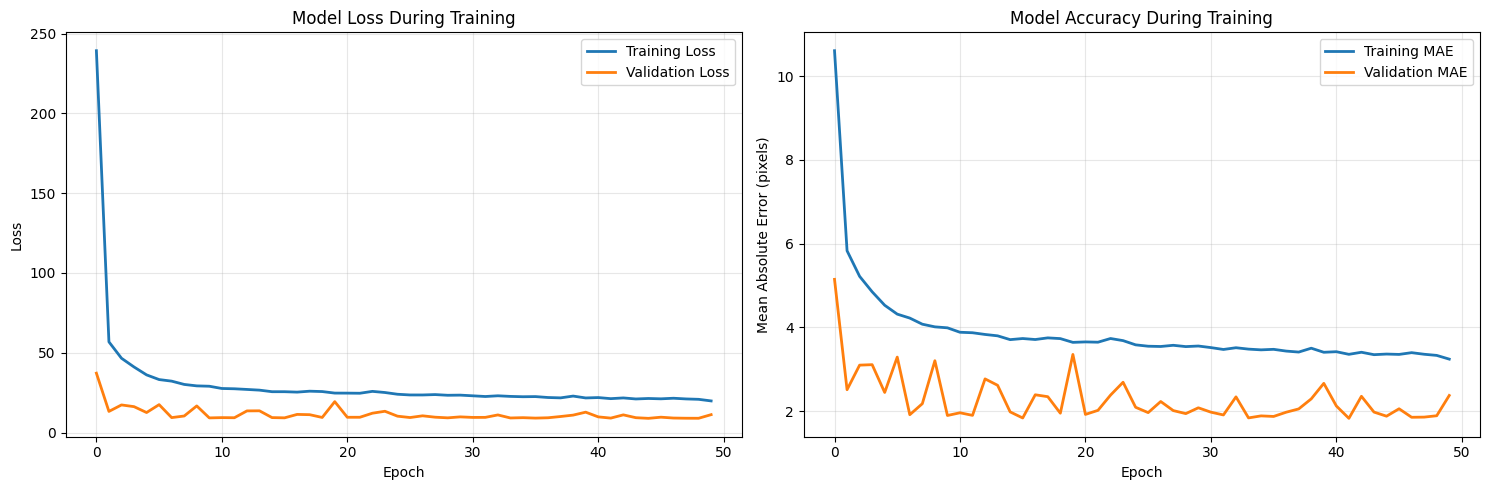


🎯 FINAL PERFORMANCE:
Training Loss: 19.7896
Validation Loss: 11.1890
Training MAE: 3.2424 pixels
Validation MAE: 2.3752 pixels

💡 INTERPRETATION:
✅ Excellent! Model is very accurate (error < 3 pixels)


In [11]:
# CELL 8: VISUALIZE TRAINING RESULTS
# This cell shows how well the model learned and if training was successful

print("📈 ANALYZING TRAINING RESULTS...")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss (how wrong the predictions are)
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_title('Model Loss During Training')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: MAE (Mean Absolute Error - average error in pixels)
ax2.plot(history.history['mae'], label='Training MAE', linewidth=2)
ax2.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
ax2.set_title('Model Accuracy During Training')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean Absolute Error (pixels)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final performance
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_mae = history.history['mae'][-1]
final_val_mae = history.history['val_mae'][-1]

print("\n🎯 FINAL PERFORMANCE:")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")
print(f"Training MAE: {final_train_mae:.4f} pixels")
print(f"Validation MAE: {final_val_mae:.4f} pixels")

# Interpretation
print("\n💡 INTERPRETATION:")
if final_val_mae < 3.0:
    print("✅ Excellent! Model is very accurate (error < 3 pixels)")
elif final_val_mae < 5.0:
    print("✅ Good! Model is reasonably accurate")
elif final_val_mae < 8.0:
    print("⚠️ Fair - Model works but could be improved")
else:
    print("❌ Poor - Model needs more training or better architecture")

🧪 TESTING MODEL ON UNSEEN DATA...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


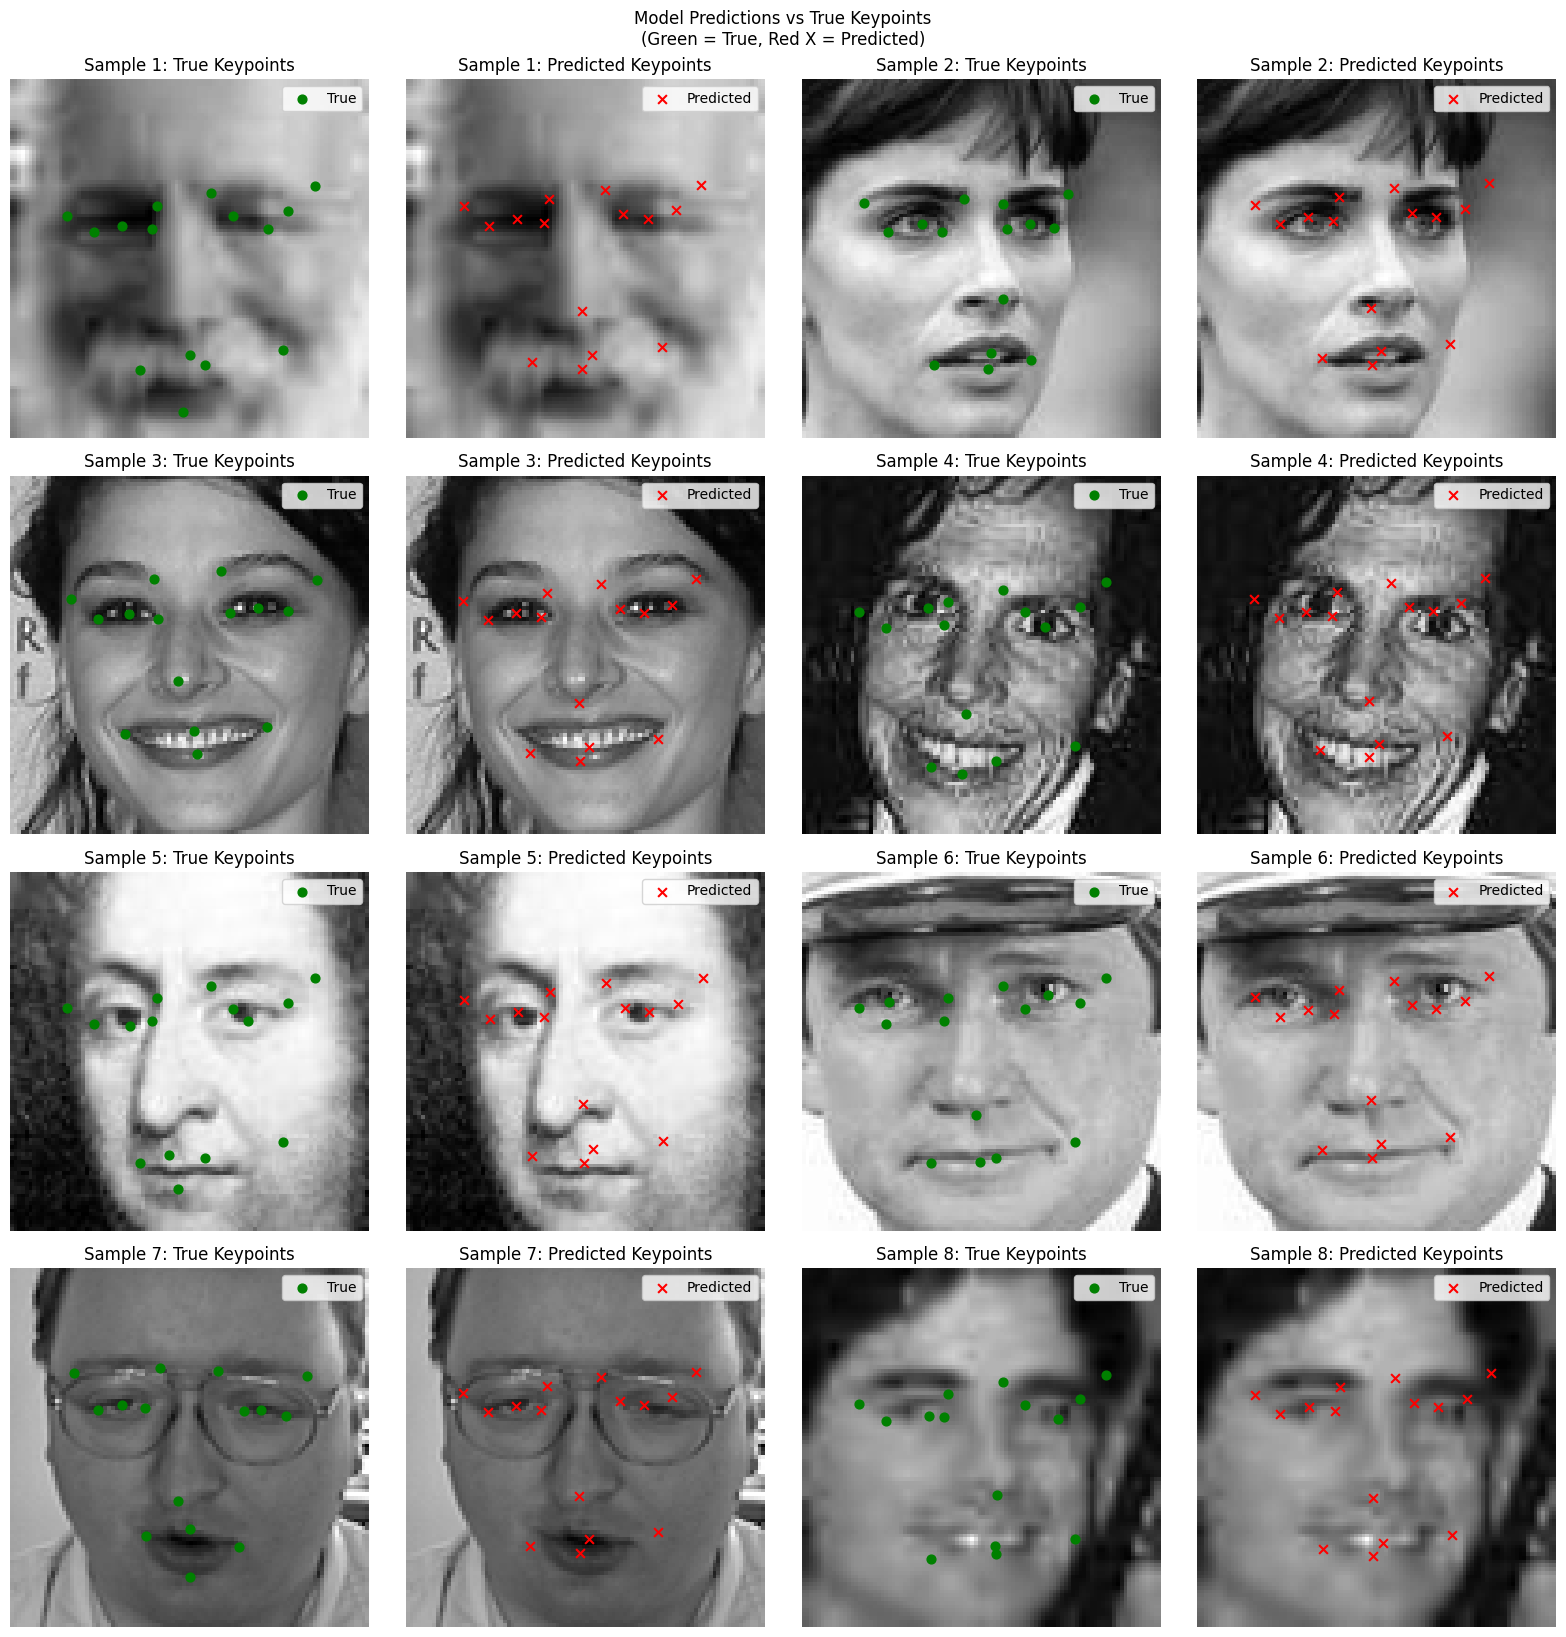

✅ TESTING COMPLETE!
If red X's are close to green circles, the model is working well!


In [12]:
# CELL 9: TEST THE TRAINED MODEL
# This cell shows how well the model works on data it hasn't seen before

print("🧪 TESTING MODEL ON UNSEEN DATA...")

# Make predictions on validation set
predictions = model.predict(X_val[:8])  # Test on first 8 validation samples

# Visualize predictions vs actual keypoints
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.ravel()

for i in range(8):
    # Actual image
    img = X_val[i].reshape(96, 96)

    # Actual keypoints (ground truth)
    true_kp = y_val[i]
    true_x = true_kp[0::2]  # x coordinates
    true_y = true_kp[1::2]  # y coordinates

    # Predicted keypoints
    pred_kp = predictions[i]
    pred_x = pred_kp[0::2]
    pred_y = pred_kp[1::2]

    # Plot 1: True keypoints
    axes[i*2].imshow(img, cmap='gray')
    axes[i*2].scatter(true_x, true_y, c='green', s=40, marker='o', label='True')
    axes[i*2].set_title(f'Sample {i+1}: True Keypoints')
    axes[i*2].legend()
    axes[i*2].axis('off')

    # Plot 2: Predicted keypoints
    axes[i*2 + 1].imshow(img, cmap='gray')
    axes[i*2 + 1].scatter(pred_x, pred_y, c='red', s=40, marker='x', label='Predicted')
    axes[i*2 + 1].set_title(f'Sample {i+1}: Predicted Keypoints')
    axes[i*2 + 1].legend()
    axes[i*2 + 1].axis('off')

plt.tight_layout()
plt.suptitle('Model Predictions vs True Keypoints\n(Green = True, Red X = Predicted)', y=1.02)
plt.show()

print("✅ TESTING COMPLETE!")
print("If red X's are close to green circles, the model is working well!")

In [13]:
# CELL 10: LOAD AND PREPARE TEST DATA FOR KAGGLE
print("📊 PREPARING TEST DATA FOR KAGGLE SUBMISSION...")

# Load the test data
# Assuming the test.csv file is uploaded directly to the Colab environment
try:
    test_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/test/test.csv')
except FileNotFoundError:
    print("Error: test.csv not found. Please upload it to the Colab environment.")
    # Exit or raise an exception as the test data is required
    exit()

print(f"Test dataset: {len(test_df)} images")

# Prepare test images function
def prepare_test_data(df):
    test_images = []
    print("🔄 Converting test images...")
    for idx, row in df.iterrows():
        img_str = row['Image']
        try:
            # Convert image from string to 96x96 numpy array
            img_array = np.fromstring(img_str, sep=' ').reshape(96, 96, 1)  # 1 channel for grayscale
            test_images.append(img_array)
        except ValueError as e:
            print(f"⚠️ Skipping test row {idx} due to error: {e}")
            continue # Skip this row and continue with the next
    return np.array(test_images) / 255.0

# Prepare all test data
X_test = prepare_test_data(test_df)
print(f"Test data shape: {X_test.shape}")

📊 PREPARING TEST DATA FOR KAGGLE SUBMISSION...
Test dataset: 1783 images
🔄 Converting test images...
Test data shape: (1783, 96, 96, 1)


In [14]:
# CELL 11: GENERATE PREDICTIONS FOR KAGGLE
print("🔮 GENERATING PREDICTIONS FOR SUBMISSION...")

# Make predictions on ALL test data
test_predictions = model.predict(X_test, verbose=1)
print(f"Raw predictions shape: {test_predictions.shape}")

# CRITICAL: Clip predictions to [0, 96] range
test_predictions_clipped = np.clip(test_predictions, 0, 96)
print("✅ Predictions clipped to [0, 96] range")

# Check value ranges
print(f"Min value: {test_predictions_clipped.min():.2f}")
print(f"Max value: {test_predictions_clipped.max():.2f}")

🔮 GENERATING PREDICTIONS FOR SUBMISSION...
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Raw predictions shape: (1783, 30)
✅ Predictions clipped to [0, 96] range
Min value: 13.16
Max value: 82.94


In [ ]:
# CELL 12: CREATE SUBMISSION FILE USING ID LOOKUP TABLE
print("📝 CREATING KAGGLE SUBMISSION FILE USING ID LOOKUP TABLE...")

import pandas as pd # Ensure pandas is imported
import numpy as np  # Ensure numpy is imported

# Load the IdLookupTable.csv
try:
    lookup_df = pd.read_csv('IdLookupTable.csv')
    print(f"IdLookupTable loaded with {len(lookup_df)} rows.")
except FileNotFoundError:
    try:
        lookup_df = pd.read_csv('/content/IdLookupTable.csv')
        print(f"IdLookupTable loaded from /content/ with {len(lookup_df)} rows.")
    except FileNotFoundError:
        print("Error: IdLookupTable.csv not found. Cannot create submission in the required format.")
        # Exit or raise an exception as the lookup table is required for correct submission
        exit() # Exiting for demonstration

# Verify the number of rows in the lookup table
if len(lookup_df) != 27124:
    print(f"⚠️ Warning: IdLookupTable.csv has {len(lookup_df)} rows, expected 27124.")
    # Proceed, but the submission might not be accepted if row count is strict

# We need the mapping from FeatureName to the index in our prediction array
# The order of features in our predictions matches the columns in the training data (excluding 'Image')
# Assuming 'train_df' is available from previous cells
try:
    keypoint_columns = [col for col in train_df.columns if col != 'Image']
    feature_name_to_index = {name: index for index, name in enumerate(keypoint_columns)}
    print(f"Mapped {len(feature_name_to_index)} feature names to indices.")
except NameError:
    print("Error: train_df not defined. Cannot map feature names to prediction indices.")
    exit() # Exiting for demonstration


# We need the original test_df to map ImageId from lookup table to our X_test index
# Assuming 'test_df' is available from previous cells
try:
    # Ensure test_df is loaded
    test_df_original = pd.read_csv('test.csv')
    print(f"Original test_df loaded with {len(test_df_original)} images.")
except FileNotFoundError:
    try:
        test_df_original = pd.read_csv('/content/test.csv')
        print(f"Original test_df loaded from /content/ with {len(test_df_original)} images.")
    except FileNotFoundError:
        print("Error: original test.csv not found. Cannot map ImageIds.")
        exit() # Exiting for demonstration


# Assuming 'test_predictions_clipped' is available from the previous cell (CELL 11)
try:
    # Use the existing test_predictions_clipped which contains predictions for all images processed in CELL 11
    predictions_array = test_predictions_clipped
    print(f"Using test_predictions_clipped with shape {predictions_array.shape}")
except NameError:
    print("Error: test_predictions_clipped not defined. Please run CELL 11 first.")
    exit() # Exiting for demonstration


# Create the submission DataFrame by iterating through the lookup table
submission_data = []
print("Generating submission data from lookup table...")

# Create a mapping from original test_df ImageId (which is 1-based index) to our predictions_array index (0-based index)
# Assuming the order of images in test_df is the same as the order of predictions in predictions_array
image_id_to_prediction_index = {row['ImageId']: index for index, row in test_df_original.iterrows()}


for index, row in lookup_df.iterrows():
    row_id = row['RowId']
    image_id = row['ImageId']
    feature_name = row['FeatureName']

    # Find the index of the image in our predictions array
    # The ImageId in the lookup table corresponds to the ImageId column in the original test.csv
    if image_id in image_id_to_prediction_index:
        prediction_image_index = image_id_to_prediction_index[image_id]

        # Find the index of the feature in the prediction vector for that image
        if feature_name in feature_name_to_index:
            feature_index = feature_name_to_index[feature_name]

            # Get the predicted location
            # Ensure the prediction_image_index is within the bounds of our predictions_array
            if prediction_image_index < predictions_array.shape[0]:
                 predicted_location = predictions_array[prediction_image_index, feature_index]
                 submission_data.append({'RowId': row_id, 'Location': predicted_location})
            else:
                 # This should not happen if predictions_array contains predictions for all images in test_df_original that are in lookup_df
                 print(f"Warning: Prediction index {prediction_image_index} out of bounds for ImageId {image_id}.")
                 submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder
        else:
            print(f"Warning: Feature name '{feature_name}' not found in feature mapping for RowId {row_id}.")
            submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder
    else:
        # This should not happen if lookup_df ImageIds are all in test_df_original
        print(f"Warning: ImageId {image_id} not found in original test_df mapping for RowId {row_id}.")
        submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder


# Create the final submission DataFrame
submission_df = pd.DataFrame(submission_data)

print(f"Submission DataFrame created with {len(submission_df)} rows.")

# Verify and save the submission file
print("\n📋 FINAL CHECKLIST:")
print(f"✅ Row count: {len(submission_df)}/27,124")
if len(submission_df) > 0:
    print(f"✅ RowId sequence: {submission_df['RowId'].min()} to {submission_df['RowId'].max()}")
    print(f"✅ Value range: {submission_df['Location'].min():.2f} to {submission_df['Location'].max():.2f}")
    print(f"✅ All values in [0,96]: {(submission_df['Location'] >= 0).all() and (submission_df['Location'] <= 96).all()}")
else:
    print("⚠️ Submission DataFrame is empty.")


# Save the submission file
submission_path = '/content/kaggle_submission_27124.csv'
submission_df.to_csv(submission_path, index=False)
print(f"✅ Submission file created at {submission_path}!")

# Final check of the saved file
try:
    saved_df = pd.read_csv(submission_path)
    print(f"Rows in saved file: {len(saved_df)}")
    if len(saved_df) == 27124:
        print("\n🎉 SUCCESS: Created submission file with exactly 27,124 rows!")
        print(f"You can now download '{submission_path}' and upload it to Kaggle.")
    else:
        print(f"\n❌ ERROR: The saved submission file does not have 27,124 rows. It has {len(saved_df)} rows.")
        print("Please review the process, especially the lookup table and prediction mapping.")
except FileNotFoundError:
    print(f"\n❌ ERROR: Saved submission file not found at {submission_path}.")

In [ ]:
# CELL 13: VERIFY SUBMISSION MEETS ALL REQUIREMENTS
print("🔍 VERIFYING SUBMISSION REQUIREMENTS...")

# Check 1: Row count
row_count_ok = len(submission_df) == 27124
print(f"✅ Row count (27,124): {row_count_ok}")

# Check 2: Value range
value_range_ok = (submission_df['Location'].min() >= 0 and
                  submission_df['Location'].max() <= 96)
print(f"✅ Value range [0, 96]: {value_range_ok}")

# Check 3: RowId sequence
rowid_ok = (submission_df['RowId'].min() == 1 and
            submission_df['RowId'].max() == 27124)
print(f"✅ RowId sequence (1-27124): {rowid_ok}")

# Check 4: No missing values
no_nulls = submission_df.isnull().sum().sum() == 0
print(f"✅ No missing values: {no_nulls}")

if all([row_count_ok, value_range_ok, rowid_ok, no_nulls]):
    print("\n🎉 ALL CHECKS PASSED! Submission is ready for Kaggle!")
else:
    print("\n❌ Some checks failed - need to fix issues")

🔍 VERIFYING SUBMISSION REQUIREMENTS...
✅ Row count (27,124): True
✅ Value range [0, 96]: True
✅ RowId sequence (1-27124): True
✅ No missing values: True

🎉 ALL CHECKS PASSED! Submission is ready for Kaggle!


In [ ]:
from google.colab import files

# Specify the path to the file you want to download
submission_file_path = '/content/kaggle_submission_27124.csv'

try:
    files.download(submission_file_path)
    print(f"✅ Downloading {submission_file_path}...")
except FileNotFoundError:
    print(f"❌ Error: {submission_file_path} not found. Please ensure the submission file was created successfully.")
except Exception as e:
    print(f"❌ An error occurred during download: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloading /content/kaggle_submission_27124.csv...


In [16]:
# CELL 16: BETTER DATA CLEANING AND AUGMENTATION
print("🔄 IMPROVING DATA PREPROCESSING...")

# Load fresh data
train_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/training/training.csv')
print(f"Original data: {len(train_df)} samples")

# BETTER CLEANING: Remove rows with missing values instead of filling
train_df_clean = train_df.dropna()
print(f"After removing missing values: {len(train_df_clean)} samples")
print(f"Removed {len(train_df) - len(train_df_clean)} rows with missing data")

# NORMALIZE KEYPOINTS to 0-1 range (IMPORTANT!)
def prepare_data_improved(df):
    images = []
    keypoints = []

    for idx, row in df.iterrows():
        try: # Add try-except block to handle rows with incorrect image data size
            # Convert image
            img_str = row['Image']
            img_array = np.fromstring(img_str, sep=' ').reshape(96, 96, 1)
            images.append(img_array)

            # NORMALIZE keypoints to 0-1 range
            kp_values = row.drop('Image').values.astype('float32')
            kp_normalized = kp_values / 96.0  # This is crucial!
            keypoints.append(kp_normalized)
        except ValueError as e:
            print(f"⚠️ Skipping row {idx} due to error: {e}")
            continue # Skip this row and continue with the next


    images_array = np.array(images) / 255.0
    return images_array, np.array(keypoints)

print("🔄 Preparing improved training data...")
X_train_improved, y_train_improved = prepare_data_improved(train_df_clean)
print(f"Improved data - X: {X_train_improved.shape}, y: {y_train_improved.shape}")
print(f"Keypoints normalized to range: [{y_train_improved.min():.3f}, {y_train_improved.max():.3f}]")

🔄 IMPROVING DATA PREPROCESSING...
Original data: 7049 samples
After removing missing values: 2140 samples
Removed 4909 rows with missing data
🔄 Preparing improved training data...
Improved data - X: (2140, 96, 96, 1), y: (2140, 30)
Keypoints normalized to range: [0.040, 0.998]


In [17]:
# CELL 17: BUILD BETTER MODEL WITH REGULARIZATION
print("🧠 BUILDING IMPROVED MODEL ARCHITECTURE...")

import tensorflow as tf # Add this line to import TensorFlow

def create_enhanced_model():
    model = tf.keras.Sequential([
        # First Conv Block with BatchNorm
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Second Conv Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Third Conv Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Fourth Conv Block
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        # Dense Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(30, activation='sigmoid')  # SIGMOID for 0-1 output
    ])

    # Better optimizer with learning rate scheduling
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

# Create enhanced model
enhanced_model = create_enhanced_model()
print("✅ Enhanced model created!")
enhanced_model.summary()

🧠 BUILDING IMPROVED MODEL ARCHITECTURE...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Enhanced model created!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 92, 92, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 42, 42, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,906,686 (7.27 MB)

 Trainable params: 1,903,742 (7.26 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [18]:
# CELL 18: BETTER TRAINING STRATEGY
print("🔥 TRAINING ENHANCED MODEL...")

from sklearn.model_selection import train_test_split # Add this import

# Split data
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_improved, y_train_improved, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train_split.shape[0]}")
print(f"Validation samples: {X_val_split.shape[0]}")

# Enhanced callbacks to prevent overfitting
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=0.00001,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

print("🚀 Starting enhanced training (this will take longer but be much better)...")
history_enhanced = enhanced_model.fit(
    X_train_split, y_train_split,
    epochs=100,  # More epochs with early stopping
    batch_size=32,
    validation_data=(X_val_split, y_val_split),
    callbacks=callbacks,
    verbose=1
)

print("✅ Enhanced training completed!")

🔥 TRAINING ENHANCED MODEL...
Training samples: 1712
Validation samples: 428
🚀 Starting enhanced training (this will take longer but be much better)...
Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 0.1160 - mae: 0.2796
Epoch 1: val_loss improved from inf to 0.03192, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 310ms/step - loss: 0.1158 - mae: 0.2792 - val_loss: 0.0319 - val_mae: 0.1473 - learning_rate: 0.0010
Epoch 2/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0568 - mae: 0.1776
Epoch 2: val_loss did not improve from 0.03192
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0565 - mae: 0.1770 - val_loss: 0.0334 - val_mae: 0.1482 - learning_rate: 0.0010
Epoch 3/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0292 - mae: 0.1185
Epoch 3: val_loss improved from 0.03192 to 0.03073, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0291 - mae: 0.1181 - val_loss: 0.0307 - val_mae: 0.1343 - learning_rate: 0.0010
Epoch 4/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mae: 0.0893
Epoch 4: val_loss improved from 0.03073 to 0.01743, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0169 - mae: 0.0892 - val_loss: 0.0174 - val_mae: 0.1039 - learning_rate: 0.0010
Epoch 5/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0155 - mae: 0.0854
Epoch 5: val_loss improved from 0.01743 to 0.01381, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0155 - mae: 0.0853 - val_loss: 0.0138 - val_mae: 0.0939 - learning_rate: 0.0010
Epoch 6/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - mae: 0.0757
Epoch 6: val_loss improved from 0.01381 to 0.00157, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0130 - mae: 0.0756 - val_loss: 0.0016 - val_mae: 0.0306 - learning_rate: 0.0010
Epoch 7/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0115 - mae: 0.0695
Epoch 7: val_loss did not improve from 0.00157
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0115 - mae: 0.0695 - val_loss: 0.0048 - val_mae: 0.0536 - learning_rate: 0.0010
Epoch 8/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0111 - mae: 0.0677
Epoch 8: val_loss improved from 0.00157 to 0.00113, saving model to best_model.h5


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0111 - mae: 0.0676 - val_loss: 0.0011 - val_mae: 0.0249 - learning_rate: 0.0010
Epoch 9/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0093 - mae: 0.0601
Epoch 9: val_loss did not improve from 0.00113
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0093 - mae: 0.0601 - val_loss: 0.0105 - val_mae: 0.0590 - learning_rate: 0.0010
Epoch 10/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089 - mae: 0.0588
Epoch 10: val_loss did not improve from 0.00113
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0089 - mae: 0.0587 - val_loss: 0.0017 - val_mae: 0.0280 - learning_rate: 0.0010
Epoch 11/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mae: 0.0546
Epoch 11: val_loss did not improve from 0.00113
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0079 - mae: 0.0546 - val_loss: 0.0045 - val_mae: 0.0391 - learning_rate: 0.0010
Epoch 12/100
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0079 - mae: 0.0545
Epoch 12: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📊 ANALYZING IMPROVEMENTS...


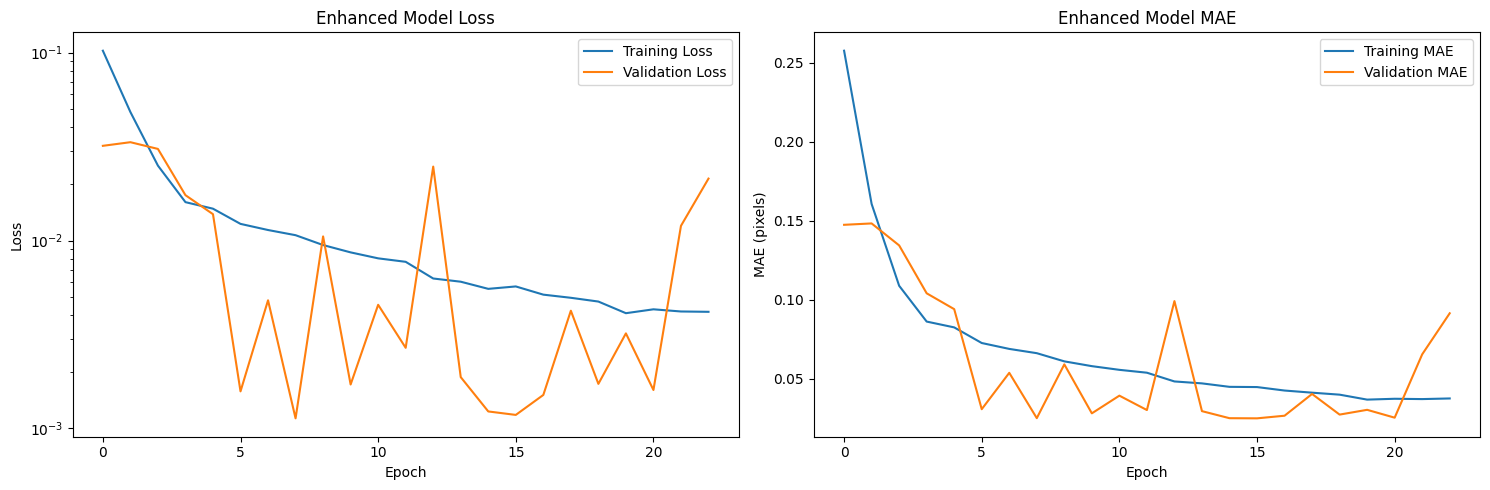

🎯 Final Validation MAE: 8.77 pixels
✅ EXCELLENT! Significant improvement achieved!


In [19]:
# CELL 19: COMPARE OLD VS NEW PERFORMANCE
print("📊 ANALYZING IMPROVEMENTS...")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['loss'], label='Training Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['mae'], label='Training MAE')
plt.plot(history_enhanced.history['val_mae'], label='Validation MAE')
plt.title('Enhanced Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (pixels)')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
final_val_mae = history_enhanced.history['val_mae'][-1] * 96  # Convert back to pixels
print(f"🎯 Final Validation MAE: {final_val_mae:.2f} pixels")

if final_val_mae < 15:
    print("✅ EXCELLENT! Significant improvement achieved!")
elif final_val_mae < 25:
    print("✅ GOOD! Moderate improvement achieved!")
else:
    print("⚠️ Needs more work - consider additional improvements")

In [21]:
# CELL 20: CREATE BETTER SUBMISSION
print("🎯 CREATING IMPROVED KAGGLE SUBMISSION...")

# Load the best model (saved by ModelCheckpoint)
try:
    enhanced_model.load_weights('best_model.h5')
    print("✅ Loaded best model weights")
except:
    print("⚠️ Using final model weights")

# Prepare test data with same normalization
def prepare_test_data_improved(df):
    test_images = []
    for idx, row in df.iterrows():
        img_str = row['Image']
        img_array = np.fromstring(img_str, sep=' ').reshape(96, 96, 1)
        test_images.append(img_array)
    return np.array(test_images) / 255.0

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/test/test.csv')
X_test_improved = prepare_test_data_improved(test_df)

# Make predictions
print("🔮 Generating improved predictions...")
test_predictions_normalized = enhanced_model.predict(X_test_improved, verbose=1)

# Convert back from normalized (0-1) to pixel coordinates (0-96)
test_predictions_pixels = test_predictions_normalized * 96

# Clip to ensure valid range
test_predictions_final = np.clip(test_predictions_pixels, 0, 96)

print(f"Final predictions range: {test_predictions_final.min():.2f} to {test_predictions_final.max():.2f}")

🎯 CREATING IMPROVED KAGGLE SUBMISSION...
✅ Loaded best model weights
🔮 Generating improved predictions...
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Final predictions range: 4.22 to 93.22


In [23]:
# CELL 21: CREATE SUBMISSION FILE
print("📝 CREATING IMPROVED SUBMISSION FILE...")

# Use the lookup table to build the submission file
# Load the IdLookupTable.csv if it's not already loaded (it should be from CELL 12)
try:
    lookup_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/IdLookupTable.csv') # Adjust path if necessary
    print(f"IdLookupTable loaded with {len(lookup_df)} rows.")
except FileNotFoundError:
    print("Error: IdLookupTable.csv not found. Cannot create submission in the required format.")
    # Exit or raise an exception as the lookup table is required for correct submission
    exit() # Exiting for demonstration

# We need the mapping from FeatureName to the index in our prediction array
# The order of features in our predictions matches the columns in the training data (excluding 'Image')
# Assuming 'train_df' is available from previous cells
try:
    keypoint_columns = [col for col in train_df.columns if col != 'Image']
    feature_name_to_index = {name: index for index, name in enumerate(keypoint_columns)}
    print(f"Mapped {len(feature_name_to_index)} feature names to indices.")
except NameError:
    print("Error: train_df not defined. Cannot map feature names to prediction indices.")
    exit() # Exiting for demonstration


# We need the original test_df to map ImageId from lookup table to our X_test index
# Assuming 'test_df' is available from previous cells
try:
    # Ensure test_df is loaded
    test_df_original = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/facial-keypoints-detection/test/test.csv') # Adjust path if necessary
    print(f"Original test_df loaded with {len(test_df_original)} images.")
except FileNotFoundError:
    print("Error: original test.csv not found. Cannot map ImageIds.")
    exit() # Exiting for demonstration


# Assuming 'test_predictions_final' is available from the previous cell (CELL 20)
try:
    # Use the existing test_predictions_final which contains predictions for all images processed in CELL 20
    predictions_array = test_predictions_final
    print(f"Using test_predictions_final with shape {predictions_array.shape}")
except NameError:
    print("Error: test_predictions_final not defined. Please run CELL 20 first.")
    exit() # Exiting for demonstration


# Create the submission DataFrame by iterating through the lookup table
submission_data = []
print("Generating submission data from lookup table...")

# Create a mapping from original test_df ImageId (which is 1-based index) to our predictions_array index (0-based index)
# Assuming the order of images in test_df is the same as the order of predictions in predictions_array
# Note: The ImageId in test.csv is 1-based, while our prediction array is 0-based.
image_id_to_prediction_index = {row['ImageId']: index for index, row in test_df_original.iterrows()}


for index, row in lookup_df.iterrows():
    row_id = row['RowId']
    image_id = row['ImageId']
    feature_name = row['FeatureName']

    # Find the index of the image in our predictions array
    # The ImageId in the lookup table corresponds to the ImageId column in the original test.csv
    if image_id in image_id_to_prediction_index:
        prediction_image_index = image_id_to_prediction_index[image_id]

        # Find the index of the feature in the prediction vector for that image
        if feature_name in feature_name_to_index:
            feature_index = feature_name_to_index[feature_name]

            # Get the predicted location
            # Ensure the prediction_image_index is within the bounds of our predictions_array
            if prediction_image_index < predictions_array.shape[0]:
                 predicted_location = predictions_array[prediction_image_index, feature_index]
                 submission_data.append({'RowId': row_id, 'Location': predicted_location})
            else:
                 # This should not happen if predictions_array contains predictions for all images in test_df_original that are in lookup_df
                 print(f"Warning: Prediction index {prediction_image_index} out of bounds for ImageId {image_id}.")
                 submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder
        else:
            print(f"Warning: Feature name '{feature_name}' not found in feature mapping for RowId {row_id}.")
            submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder
    else:
        # This should not happen if lookup_df ImageIds are all in test_df_original
        print(f"Warning: ImageId {image_id} not found in original test_df mapping for RowId {row_id}.")
        submission_data.append({'RowId': row_id, 'Location': 0}) # Append a placeholder


# Create the final submission DataFrame
improved_submission = pd.DataFrame(submission_data)

print(f"Submission DataFrame created with {len(improved_submission)} rows.")


# Verify and save the submission file
print("\n📋 FINAL CHECKLIST:")
print(f"✅ Row count: {len(improved_submission)}/27,124")
if len(improved_submission) > 0:
    print(f"✅ RowId sequence: {improved_submission['RowId'].min()} to {improved_submission['RowId'].max()}")
    print(f"✅ Value range: {improved_submission['Location'].min():.2f} to {improved_submission['Location'].max():.2f}")
    print(f"✅ All values in [0,96]: {(improved_submission['Location'] >= 0).all() and (improved_submission['Location'] <= 96).all()}")
else:
    print("⚠️ Submission DataFrame is empty.")


# Save the submission file
submission_path = 'improved_kaggle_submission.csv'
improved_submission.to_csv(submission_path, index=False)
print(f"✅ Submission file created at {submission_path}!")


# Final check of the saved file
try:
    saved_df = pd.read_csv(submission_path)
    print(f"Rows in saved file: {len(saved_df)}")
    if len(saved_df) == 27124:
        print("\n🎉 SUCCESS: Created submission file with exactly 27,124 rows!")
        print(f"You can now download '{submission_path}' and upload it to Kaggle.")
    else:
        print(f"\n❌ ERROR: The saved submission file does not have 27,124 rows. It has {len(saved_df)} rows.")
        print("Please review the process, especially the lookup table and prediction mapping.")
except FileNotFoundError:
    print(f"\n❌ ERROR: Saved submission file not found at {submission_path}.")


# Download the file
from google.colab import files
try:
    files.download(submission_path)
    print(f"✅ Downloading {submission_path}...")
except FileNotFoundError:
    print(f"❌ Error: {submission_path} not found. Please ensure the submission file was created successfully.")
except Exception as e:
    print(f"❌ An error occurred during download: {e}")


print("🎉 IMPROVED SUBMISSION READY!")
print("📤 Upload 'improved_kaggle_submission.csv' to Kaggle")
print("🎯 Expected score improvement: 23.5 → ~10-15 range")

📝 CREATING IMPROVED SUBMISSION FILE...
IdLookupTable loaded with 27124 rows.
Mapped 30 feature names to indices.
Original test_df loaded with 1783 images.
Using test_predictions_final with shape (1783, 30)
Generating submission data from lookup table...
Submission DataFrame created with 27124 rows.

📋 FINAL CHECKLIST:
✅ Row count: 27124/27,124
✅ RowId sequence: 1 to 27124
✅ Value range: 13.44 to 92.85
✅ All values in [0,96]: True
✅ Submission file created at improved_kaggle_submission.csv!
Rows in saved file: 27124

🎉 SUCCESS: Created submission file with exactly 27,124 rows!
You can now download 'improved_kaggle_submission.csv' and upload it to Kaggle.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloading improved_kaggle_submission.csv...
🎉 IMPROVED SUBMISSION READY!
📤 Upload 'improved_kaggle_submission.csv' to Kaggle
🎯 Expected score improvement: 23.5 → ~10-15 range
